<a href="https://colab.research.google.com/github/minji-sung/pythonlab/blob/main/17_Korean%20Tourism2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 한국관광데이터

In [ ]:
# 시각화
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd 

Mounted at /content/drive


In [ ]:
% cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


## 한국관광 데이터 전체

In [ ]:
import pandas as pd
df = pd.read_excel('./country_ktour.xlsx')
df

,연도,월,대륙,국적,계,관광,전체비율(%),상용,공용,유학연수,기타,기준연월,관광객비율(%)
0,2010,1,아시아,중국,91252,40425,10.09,11930,55,2751,36091,2010-01,44.3
1,2010,1,아시아,일본,209184,202825,50.60,1750,89,549,3971,2010-01,97.0
2,2010,1,아시아,대만,36399,35788,8.93,41,17,37,516,2010-01,98.3
3,2010,1,아시아,홍콩,14545,13874,3.46,55,0,21,595,2010-01,95.4
4,2010,1,아시아,마카오,554,554,0.14,0,0,0,0,2010-01,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6775,2019,5,오세아니아,오세아니아 기타,638,499,0.04,2,10,6,121,2019-05,78.2
6776,2019,5,아프리카,남아프리카공화국,1064,513,0.04,9,7,2,533,2019-05,48.2
6777,2019,5,아프리카,아프리카 기타,3214,1208,0.10,578,72,93,1263,2019-05,37.6
6778,2019,5,기타,국적미상,72,44,0.00,3,0,0,25,2019-05,61.1


In [ ]:
df_pivot = df.pivot_table(values = '전체비율(%)', index = '국적')
df_top5 = df_pivot.sort_values(by = '전체비율(%)', ascending = False).head(5)
df_top5

,전체비율(%)
국적,
중국,32.046106
일본,28.488761
대만,6.584602
미국,6.033982
홍콩,4.639381


In [ ]:
df['기준연월'] = pd.to_datetime(df['기준연월'])

In [ ]:
c_lst = df_top5.index
c_lst

Index(['중국', '일본', '대만', '미국', '홍콩'], dtype='object', name='국적')

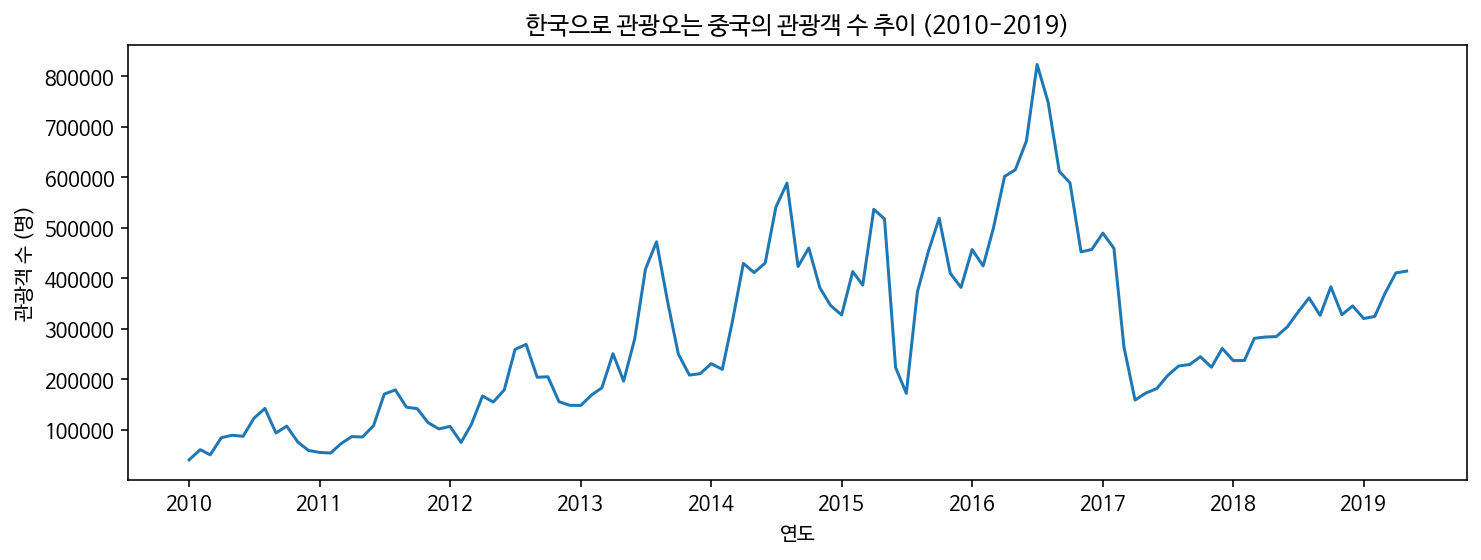

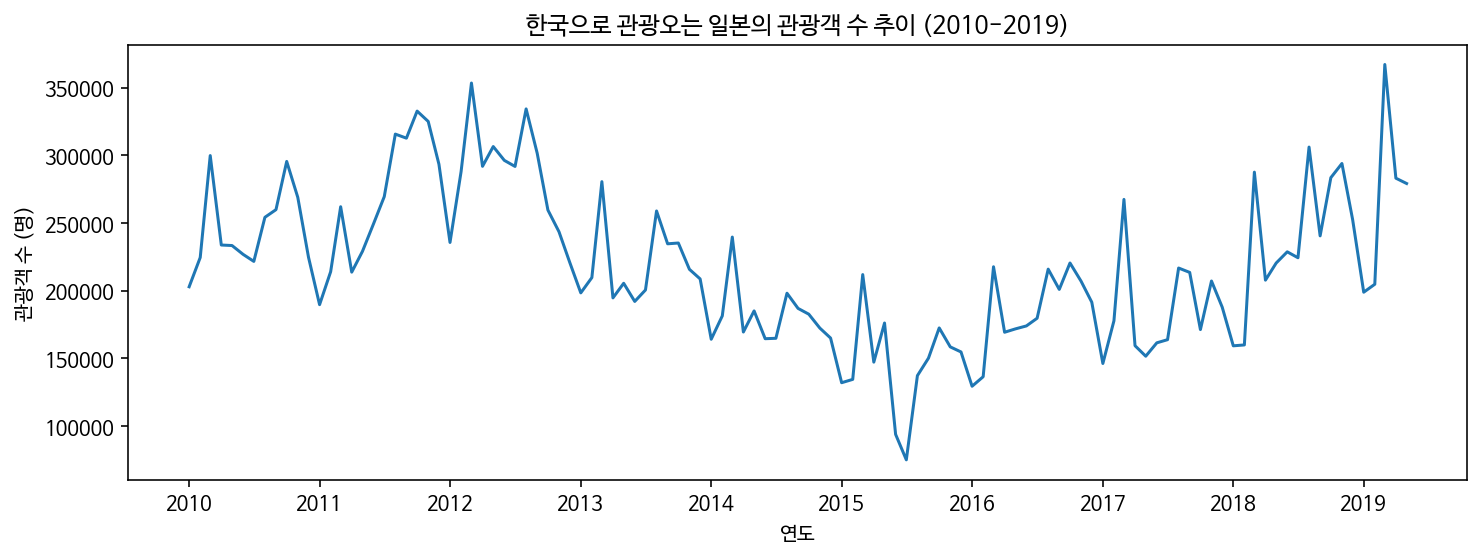

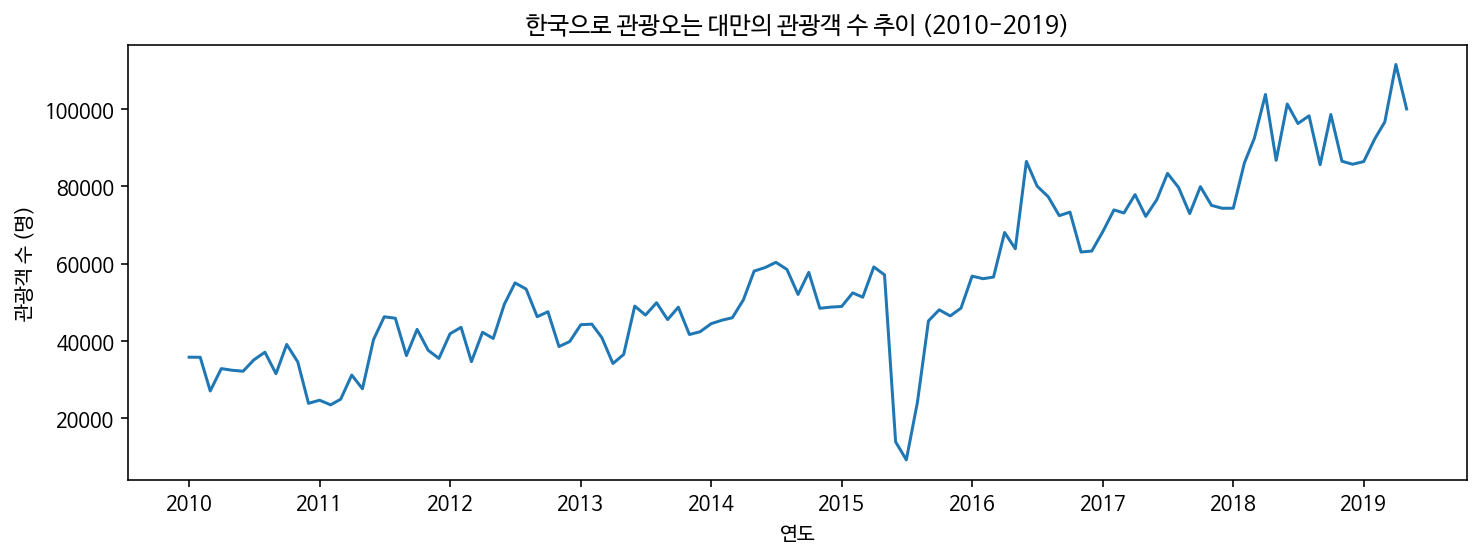

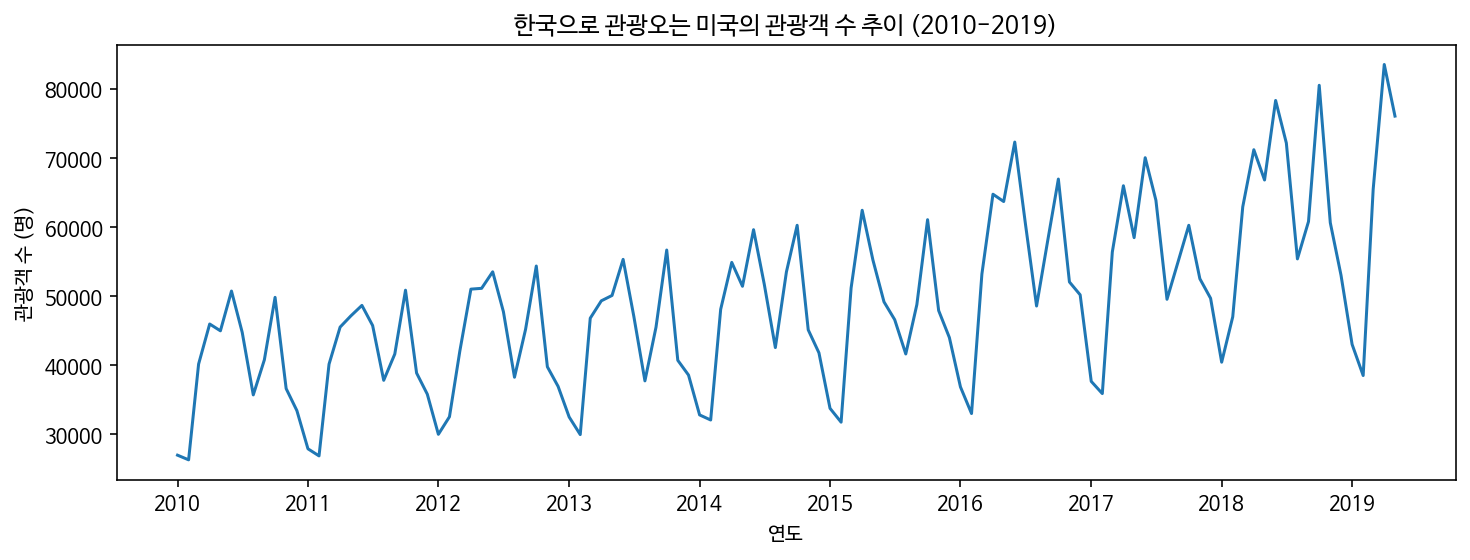

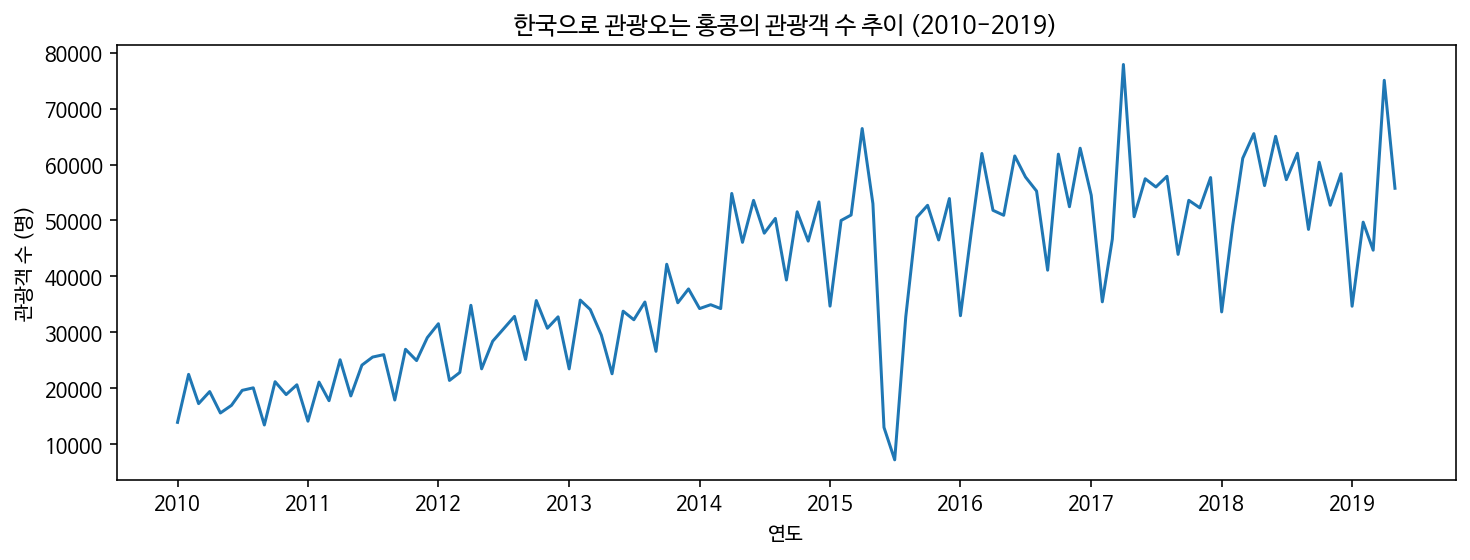

In [ ]:
import matplotlib.pyplot as plt

for i in c_lst: 
    condition = df['국적'] == i
    df_filter = df[condition]

    plt.figure(figsize= (12, 4))
    plt.plot(df_filter['기준연월'], df_filter['관광'])
    plt.title(f'한국으로 관광오는 {i}의 관광객 수 추이 (2010-2019)')
    plt.xlabel('연도')
    plt.ylabel('관광객 수 (명)') 






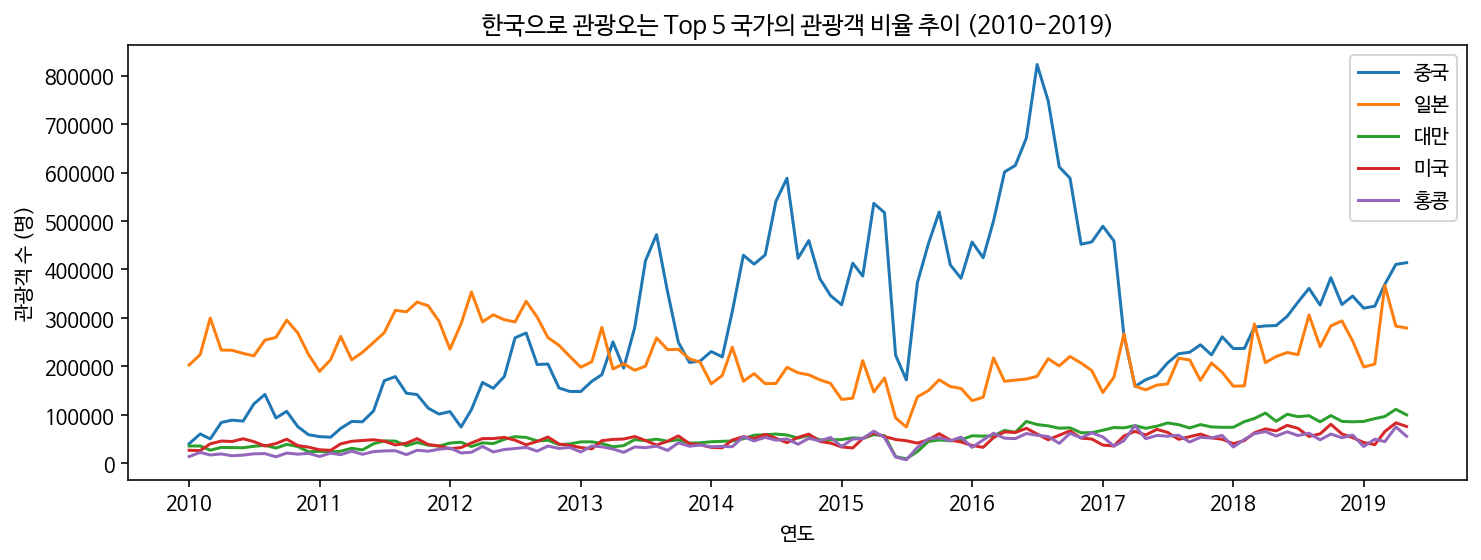

In [ ]:
# 다섯개를 하나에

plt.figure(figsize = (12,4))

for i in c_lst: 
    condition = df['국적'] == i
    df_filter = df[condition]
    plt.plot(df_filter['기준연월'], df_filter['관광'], label = i)

plt.title('한국으로 관광오는 Top 5 국가의 관광객 비율 추이 (2010-2019)')
plt.xlabel('연도')
plt.ylabel('관광객 수 (명)')    
plt.legend(loc = 1)
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6780 entries, 0 to 6779
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   연도        6780 non-null   int64         
 1   월         6780 non-null   int64         
 2   대륙        6780 non-null   object        
 3   국적        6780 non-null   object        
 4   계         6780 non-null   int64         
 5   관광        6780 non-null   int64         
 6   전체비율(%)   6780 non-null   float64       
 7   상용        6780 non-null   int64         
 8   공용        6780 non-null   int64         
 9   유학연수      6780 non-null   int64         
 10  기타        6780 non-null   int64         
 11  기준연월      6780 non-null   datetime64[ns]
 12  관광객비율(%)  6780 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(8), object(2)
memory usage: 688.7+ KB


## 한국관광 201901

In [ ]:
import pandas as pd
df1 = pd.read_excel('./201901관광객.xlsx')
df1

,연도,월,대륙,국적,계,관광,전체비율(%),상용,공용,유학연수,기타,기준연월,관광객비율(%)
0,2019,1,아시아,중국,392814,320113,36.20,2993,138,8793,60777,2019-01,81.49
1,2019,1,아시아,일본,206526,198805,22.48,2233,127,785,4576,2019-01,96.26
2,2019,1,아시아,대만,87954,86393,9.77,74,22,180,1285,2019-01,98.23
3,2019,1,아시아,홍콩,35896,34653,3.92,59,2,90,1092,2019-01,96.54
4,2019,1,아시아,마카오,2570,2506,0.28,2,0,17,45,2019-01,97.51
5,2019,1,아시아,필리핀,30473,14279,1.61,211,161,184,15638,2019-01,46.86
6,2019,1,아시아,인도네시아,18842,14183,1.60,136,38,187,4298,2019-01,75.27
7,2019,1,아시아,태국,41334,34004,3.85,37,199,96,6998,2019-01,82.27
8,2019,1,아시아,베트남,20183,10739,1.21,763,110,1667,6904,2019-01,53.21
9,2019,1,아시아,인도,8671,2318,0.26,2656,46,177,3474,2019-01,26.73


In [ ]:
df1['기준연월'] = pd.to_datetime(df1['기준연월'])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   연도        60 non-null     int64         
 1   월         60 non-null     int64         
 2   대륙        60 non-null     object        
 3   국적        60 non-null     object        
 4   계         60 non-null     int64         
 5   관광        60 non-null     int64         
 6   전체비율(%)   60 non-null     float64       
 7   상용        60 non-null     int64         
 8   공용        60 non-null     int64         
 9   유학연수      60 non-null     int64         
 10  기타        60 non-null     int64         
 11  기준연월      60 non-null     datetime64[ns]
 12  관광객비율(%)  60 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(8), object(2)
memory usage: 6.2+ KB


In [ ]:
df1.head()

,연도,월,대륙,국적,계,관광,전체비율(%),상용,공용,유학연수,기타,기준연월,관광객비율(%)
0,2019,1,아시아,중국,392814,320113,36.20,2993,138,8793,60777,2019-01-01,81.49
1,2019,1,아시아,일본,206526,198805,22.48,2233,127,785,4576,2019-01-01,96.26
2,2019,1,아시아,대만,87954,86393,9.77,74,22,180,1285,2019-01-01,98.23
3,2019,1,아시아,홍콩,35896,34653,3.92,59,2,90,1092,2019-01-01,96.54
4,2019,1,아시아,마카오,2570,2506,0.28,2,0,17,45,2019-01-01,97.51


In [ ]:
sum2019 = sum(df1['관광'])
sum2019

884293

In [ ]:
df1['총비율(%)'] = round(df1['관광']/sum2019*100, 2)
df1.head()

,연도,월,대륙,국적,계,관광,전체비율(%),상용,공용,유학연수,기타,기준연월,관광객비율(%),총비율(%)
0,2019,1,아시아,중국,392814,320113,36.20,2993,138,8793,60777,2019-01-01,81.49,36.20
1,2019,1,아시아,일본,206526,198805,22.48,2233,127,785,4576,2019-01-01,96.26,22.48
2,2019,1,아시아,대만,87954,86393,9.77,74,22,180,1285,2019-01-01,98.23,9.77
3,2019,1,아시아,홍콩,35896,34653,3.92,59,2,90,1092,2019-01-01,96.54,3.92
4,2019,1,아시아,마카오,2570,2506,0.28,2,0,17,45,2019-01-01,97.51,0.28


In [ ]:
df_sorted10 = df1.sort_values(by = '전체비율(%)', ascending = False).head(10)

In [ ]:
df_sorted10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 6
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   연도        10 non-null     int64         
 1   월         10 non-null     int64         
 2   대륙        10 non-null     object        
 3   국적        10 non-null     object        
 4   계         10 non-null     int64         
 5   관광        10 non-null     int64         
 6   전체비율(%)   10 non-null     float64       
 7   상용        10 non-null     int64         
 8   공용        10 non-null     int64         
 9   유학연수      10 non-null     int64         
 10  기타        10 non-null     int64         
 11  기준연월      10 non-null     datetime64[ns]
 12  관광객비율(%)  10 non-null     float64       
 13  총비율(%)    10 non-null     float64       
dtypes: datetime64[ns](1), float64(3), int64(8), object(2)
memory usage: 1.2+ KB


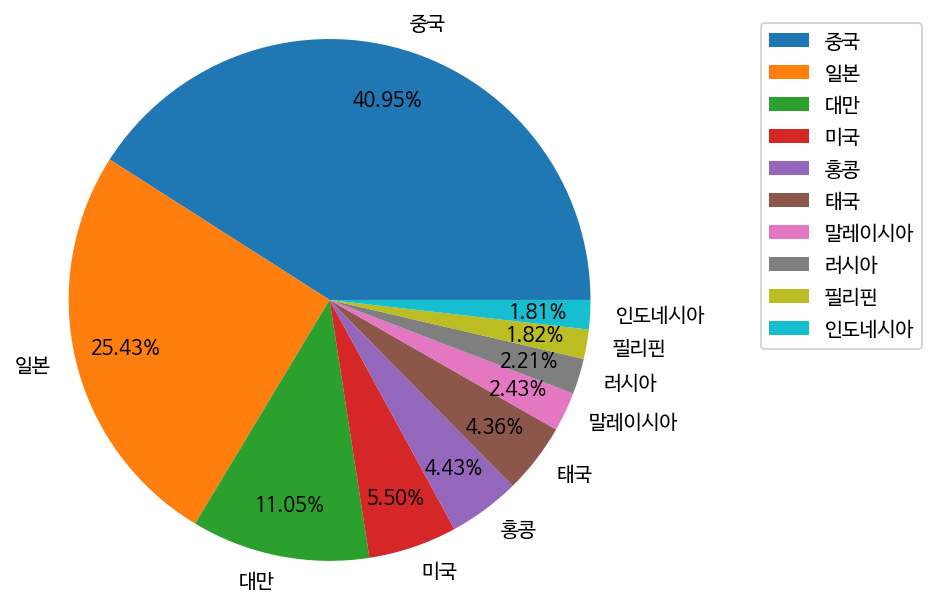

In [ ]:
import matplotlib.pyplot as plt

total_rate = df_sorted10['전체비율(%)']
labels = df_sorted10['국적']

plt.pie(total_rate, autopct= '%1.2f%%', labels= labels,
        pctdistance = 0.8, radius = 1.5)
#plt.title('2019년 1월 상위 10개국 관광목적 방한국가')
plt.legend(labels, bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

## 한국관광: 중국

In [ ]:
import pandas as pd
df_c = pd.read_excel('./중국인관광객20102019.xlsx')
df_c

,연도,월,대륙,국적,계,관광,전체비율(%),상용,공용,유학연수,기타,기준연월,관광객비율(%)
0,2010,1,아시아,중국,91252,40425,10.09,11930,55,2751,36091,2010-01-01,44.30
1,2010,2,아시아,중국,140571,60590,13.57,7907,68,29546,42460,2010-02-01,43.10
2,2010,3,아시아,중국,141457,50330,9.23,13549,174,14924,62480,2010-03-01,35.58
3,2010,4,아시아,중국,147680,84252,15.51,13306,212,2199,47711,2010-04-01,57.05
4,2010,5,아시아,중국,154066,89056,16.95,12325,360,2931,49394,2010-05-01,57.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,2019,1,아시아,중국,392814,320113,36.20,2993,138,8793,60777,2019-01-01,81.49
109,2019,2,아시아,중국,453379,324291,35.72,2694,143,38731,87520,2019-02-01,71.53
110,2019,3,아시아,중국,487623,369165,29.49,3933,414,32532,81579,2019-03-01,75.71
111,2019,4,아시아,중국,493250,410542,29.69,3575,362,9959,68812,2019-04-01,83.23


In [ ]:
df_c_pivot = df_c.pivot_table(values = '관광', index = '연도', columns = '월')
df_c_pivot

월,1,2,3,4,5,6,7,8,9,10,11,12
연도,,,,,,,,,,,,
2010,40425.0,60590.0,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0,107237.0,75686.0,58987.0
2011,55070.0,53863.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0,141824.0,113856.0,101605.0
2012,106606.0,74895.0,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0,204866.0,155503.0,148320.0
2013,148118.0,169395.0,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0,249850.0,208175.0,210950.0
2014,230706.0,219533.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0,459708.0,381118.0,345957.0
2015,327225.0,413096.0,386386.0,536428.0,517154.0,223101.0,172075.0,372990.0,453670.0,518651.0,409635.0,381722.0
2016,456636.0,424232.0,500018.0,601460.0,614636.0,671493.0,823016.0,747818.0,611538.0,588561.0,452082.0,456882.0
2017,489256.0,458952.0,263788.0,158784.0,172527.0,181507.0,207099.0,226153.0,229172.0,244541.0,223743.0,260983.0
2018,236825.0,237075.0,281020.0,283533.0,284317.0,303405.0,332657.0,360982.0,326438.0,382922.0,327664.0,345135.0


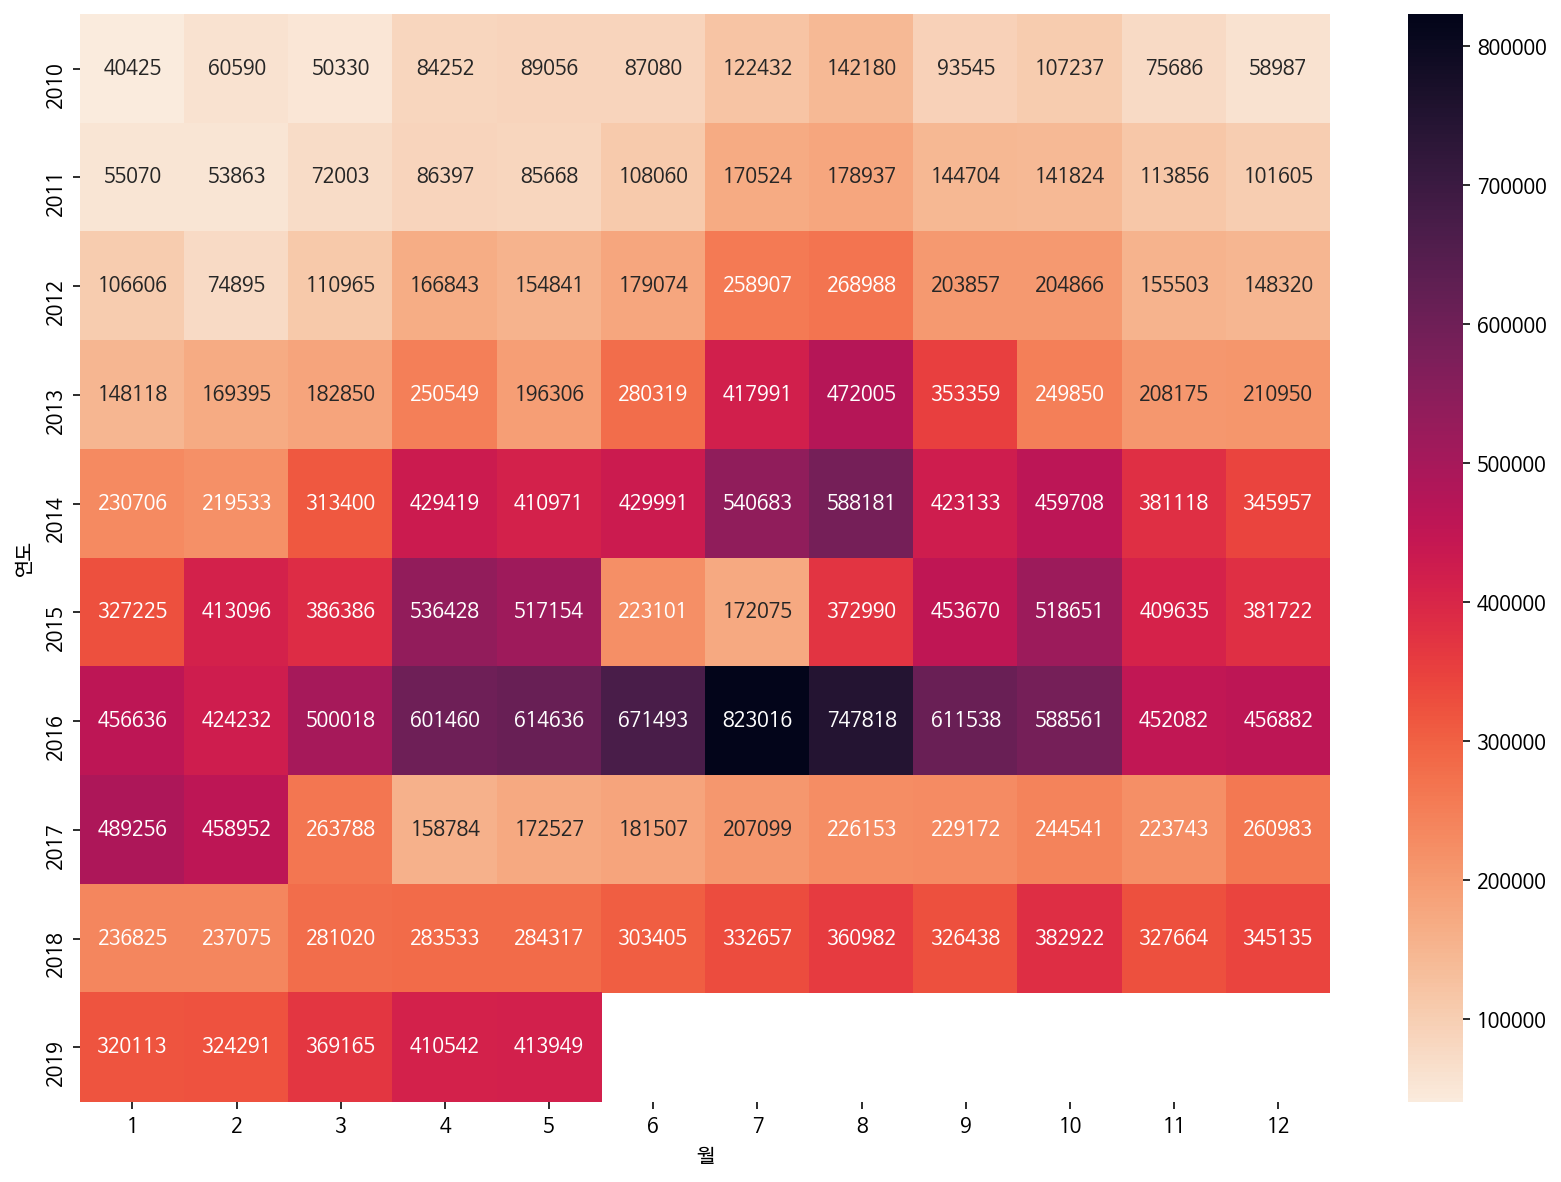

In [ ]:
import seaborn as sns
plt.figure(figsize = (14, 10))
sns.heatmap(df_c_pivot, annot = True, fmt = '.0f', cmap = 'rocket_r')
plt.show()